In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import cv2, PIL, glob, pathlib
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
import pathlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preparation :

In [3]:
normal = pathlib.Path("/content/drive/My Drive/dataset/normal")
glaucoma = pathlib.Path("/content/drive/My Drive/dataset/glaucoma")
retinopathy = pathlib.Path("/content/drive/My Drive/dataset/diabetic_retinopathy")
cataract = pathlib.Path("/content/drive/My Drive/dataset/cataract")


In [4]:
images_dict = {"normal": list(normal.glob("*.jpg")),
              "glaucoma": list(glaucoma.glob("*.jpg")),
              "diabetic_retinopathy":list(retinopathy.glob("*.jpg")),
              "cataract":list(cataract.glob("*.jpg"))}
labels_dict = {
    "normal":0, "glaucoma":1, "diabetic_retinopathy":2, "cataract":3
}

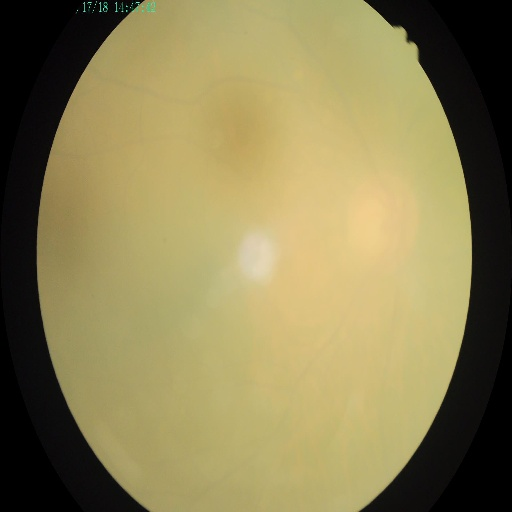

In [5]:
PIL.Image.open(str(images_dict["cataract"][200]))

# Data Preprocessing :

In [7]:
X, y = [], []
for label, images in images_dict.items():
    for image in images:
        image = cv2.imread(str(image))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (180, 180))
        if image is not None:
            X.append(image)
            y.append(labels_dict[label])

In [8]:
X = np.array(X)
y = np.array(y)

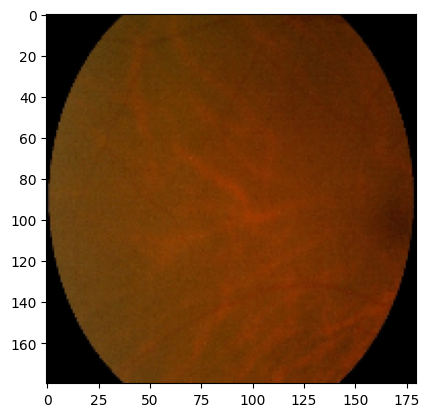

In [9]:
plt.imshow(X[1])
plt.show()

In [10]:
X = X/255

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Model Building and Training :

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

**Data Argumentation :**

Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.


In [14]:
data_augmentation = keras.Sequential([
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomContrast(0.3),
    keras.layers.RandomZoom(0.3),
    keras.layers.RandomZoom(0.7),
])


In [15]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(180, 180, 3)),  # Define the input shape explicitly
    data_augmentation,  # Apply data augmentation
    layers.Conv2D(64, (5, 5), padding="same", activation="relu"),  # Use ReLU for hidden layers
    layers.MaxPooling2D(),
    layers.Conv2D(32, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(8, (5, 5), padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(50, activation="relu"),  # Use ReLU for hidden dense layers
    layers.Dense(10, activation="softmax")  # Final layer for classification with softmax
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [16]:
model.fit(X_train, y_train, epochs=150)

Epoch 1/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 14s 93ms/step - accuracy: 0.3530 - loss: 1.3532
Epoch 2/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.3594 - loss: 1.1137
Epoch 3/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.4324 - loss: 1.0709
Epoch 4/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.4609 - loss: 1.0572
Epoch 5/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.4992 - loss: 1.0041
Epoch 6/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.4425 - loss: 1.0332
Epoch 7/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.5163 - loss: 0.9780
Epoch 8/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.5214 - loss: 0.9581
Epoch 9/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.5341 - loss: 0.9479
Epoch 10/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.5249 - loss: 0.9534
Epoch 11/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.5540 - loss: 0.9162
Epoch 12/150
73/73 ━━━━━━━━━━━━━━━━━━━━ 10s 74

In [17]:
model.evaluate(X_test, y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8228 - loss: 0.4971


[0.5173438787460327, 0.8099315166473389]

# Model Evaluation:

In [18]:
pred = model.predict(X_test[:10]) # predicting first 10 values
predslist = []
for i in pred:
    predslist.append(np.argmax(i)) # argmax() returns max value of an array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


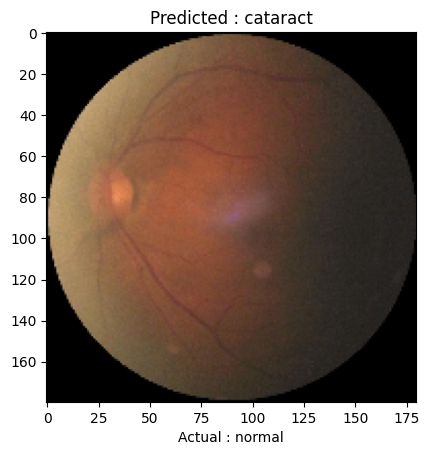

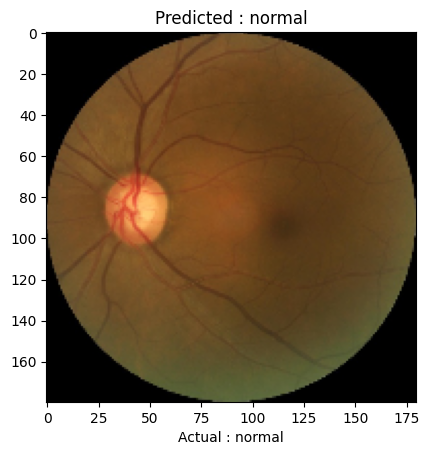

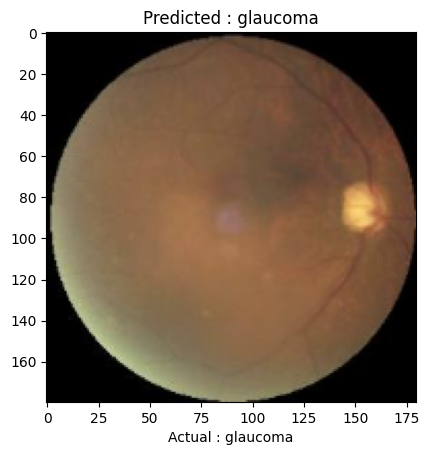

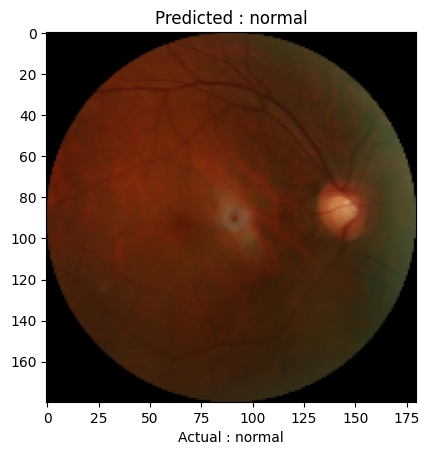

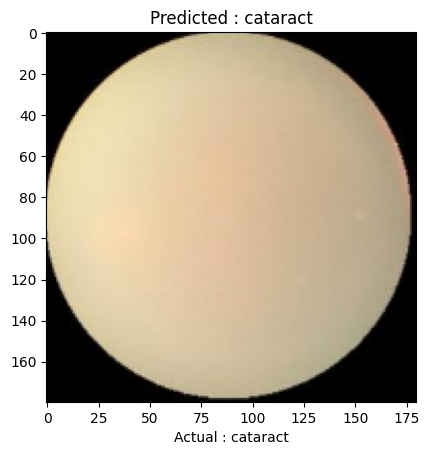

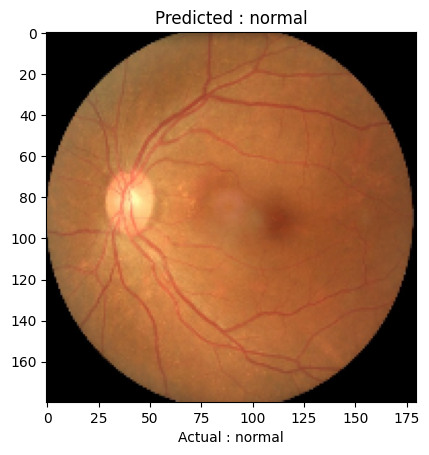

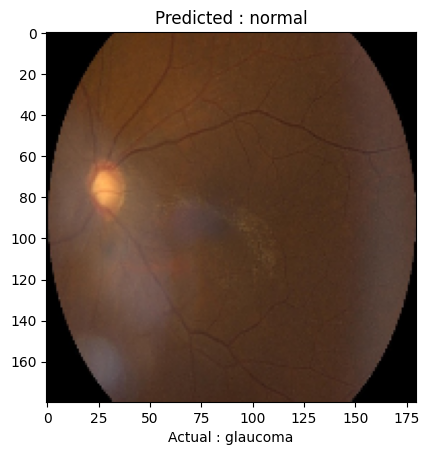

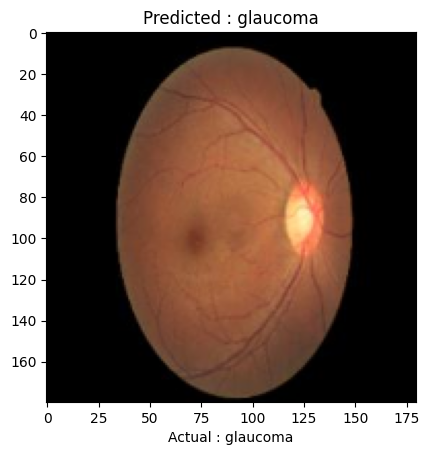

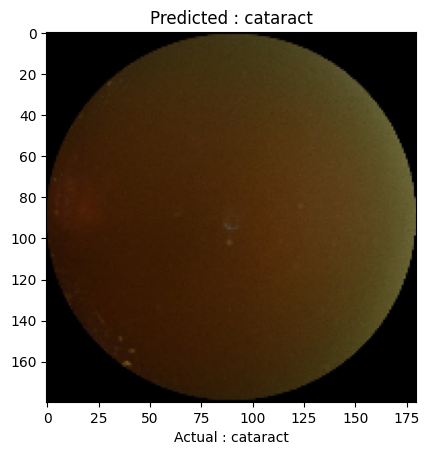

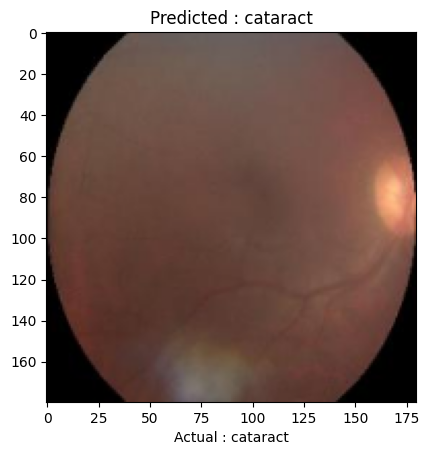

In [19]:
answers = ["normal", 'glaucoma', "diabetic_retinopathy", "cataract"]
for i in range(10):
    plt.imshow(X_test[i])
    plt.title("Predicted : "+ str(answers[predslist[i]]))
    plt.xlabel("Actual : "+str(answers[y_test[i]]))
    plt.show()

In [21]:
model.save("/content/drive/My Drive/parkinson_eye_model.h5")

In [20]:
# Load the saved model
from tensorflow.keras.models import load_model

loaded_model = load_model("/content/drive/My Drive/parkinson_eye_model.h5")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/My Drive/parkinson_eye_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)